<a href="https://colab.research.google.com/github/psathish10/efa_projects/blob/main/fruit_train1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Feb 28 06:54:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

CLI

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QxIlTfCKtN9J24fUxd70")
project = rf.workspace("sathish-p-mdirq").project("fruit-nb1tl")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=43eea925eeb0ab0a8b881e95589d97ab37e476bb57562f13dc99a03e7bbdd3fe
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to fruit-1 in yolov8:: 100%|██████████| 438/438 [00:00<00:00, 856.48it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=60 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:07<00:00, 7.03MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/fruit-1/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1677567348.59ebdbbab521.1787.0  train_batch500.jpg
F1_curve.png					    train_batch501.jpg
P_curve.png					    train_batch502.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


/content


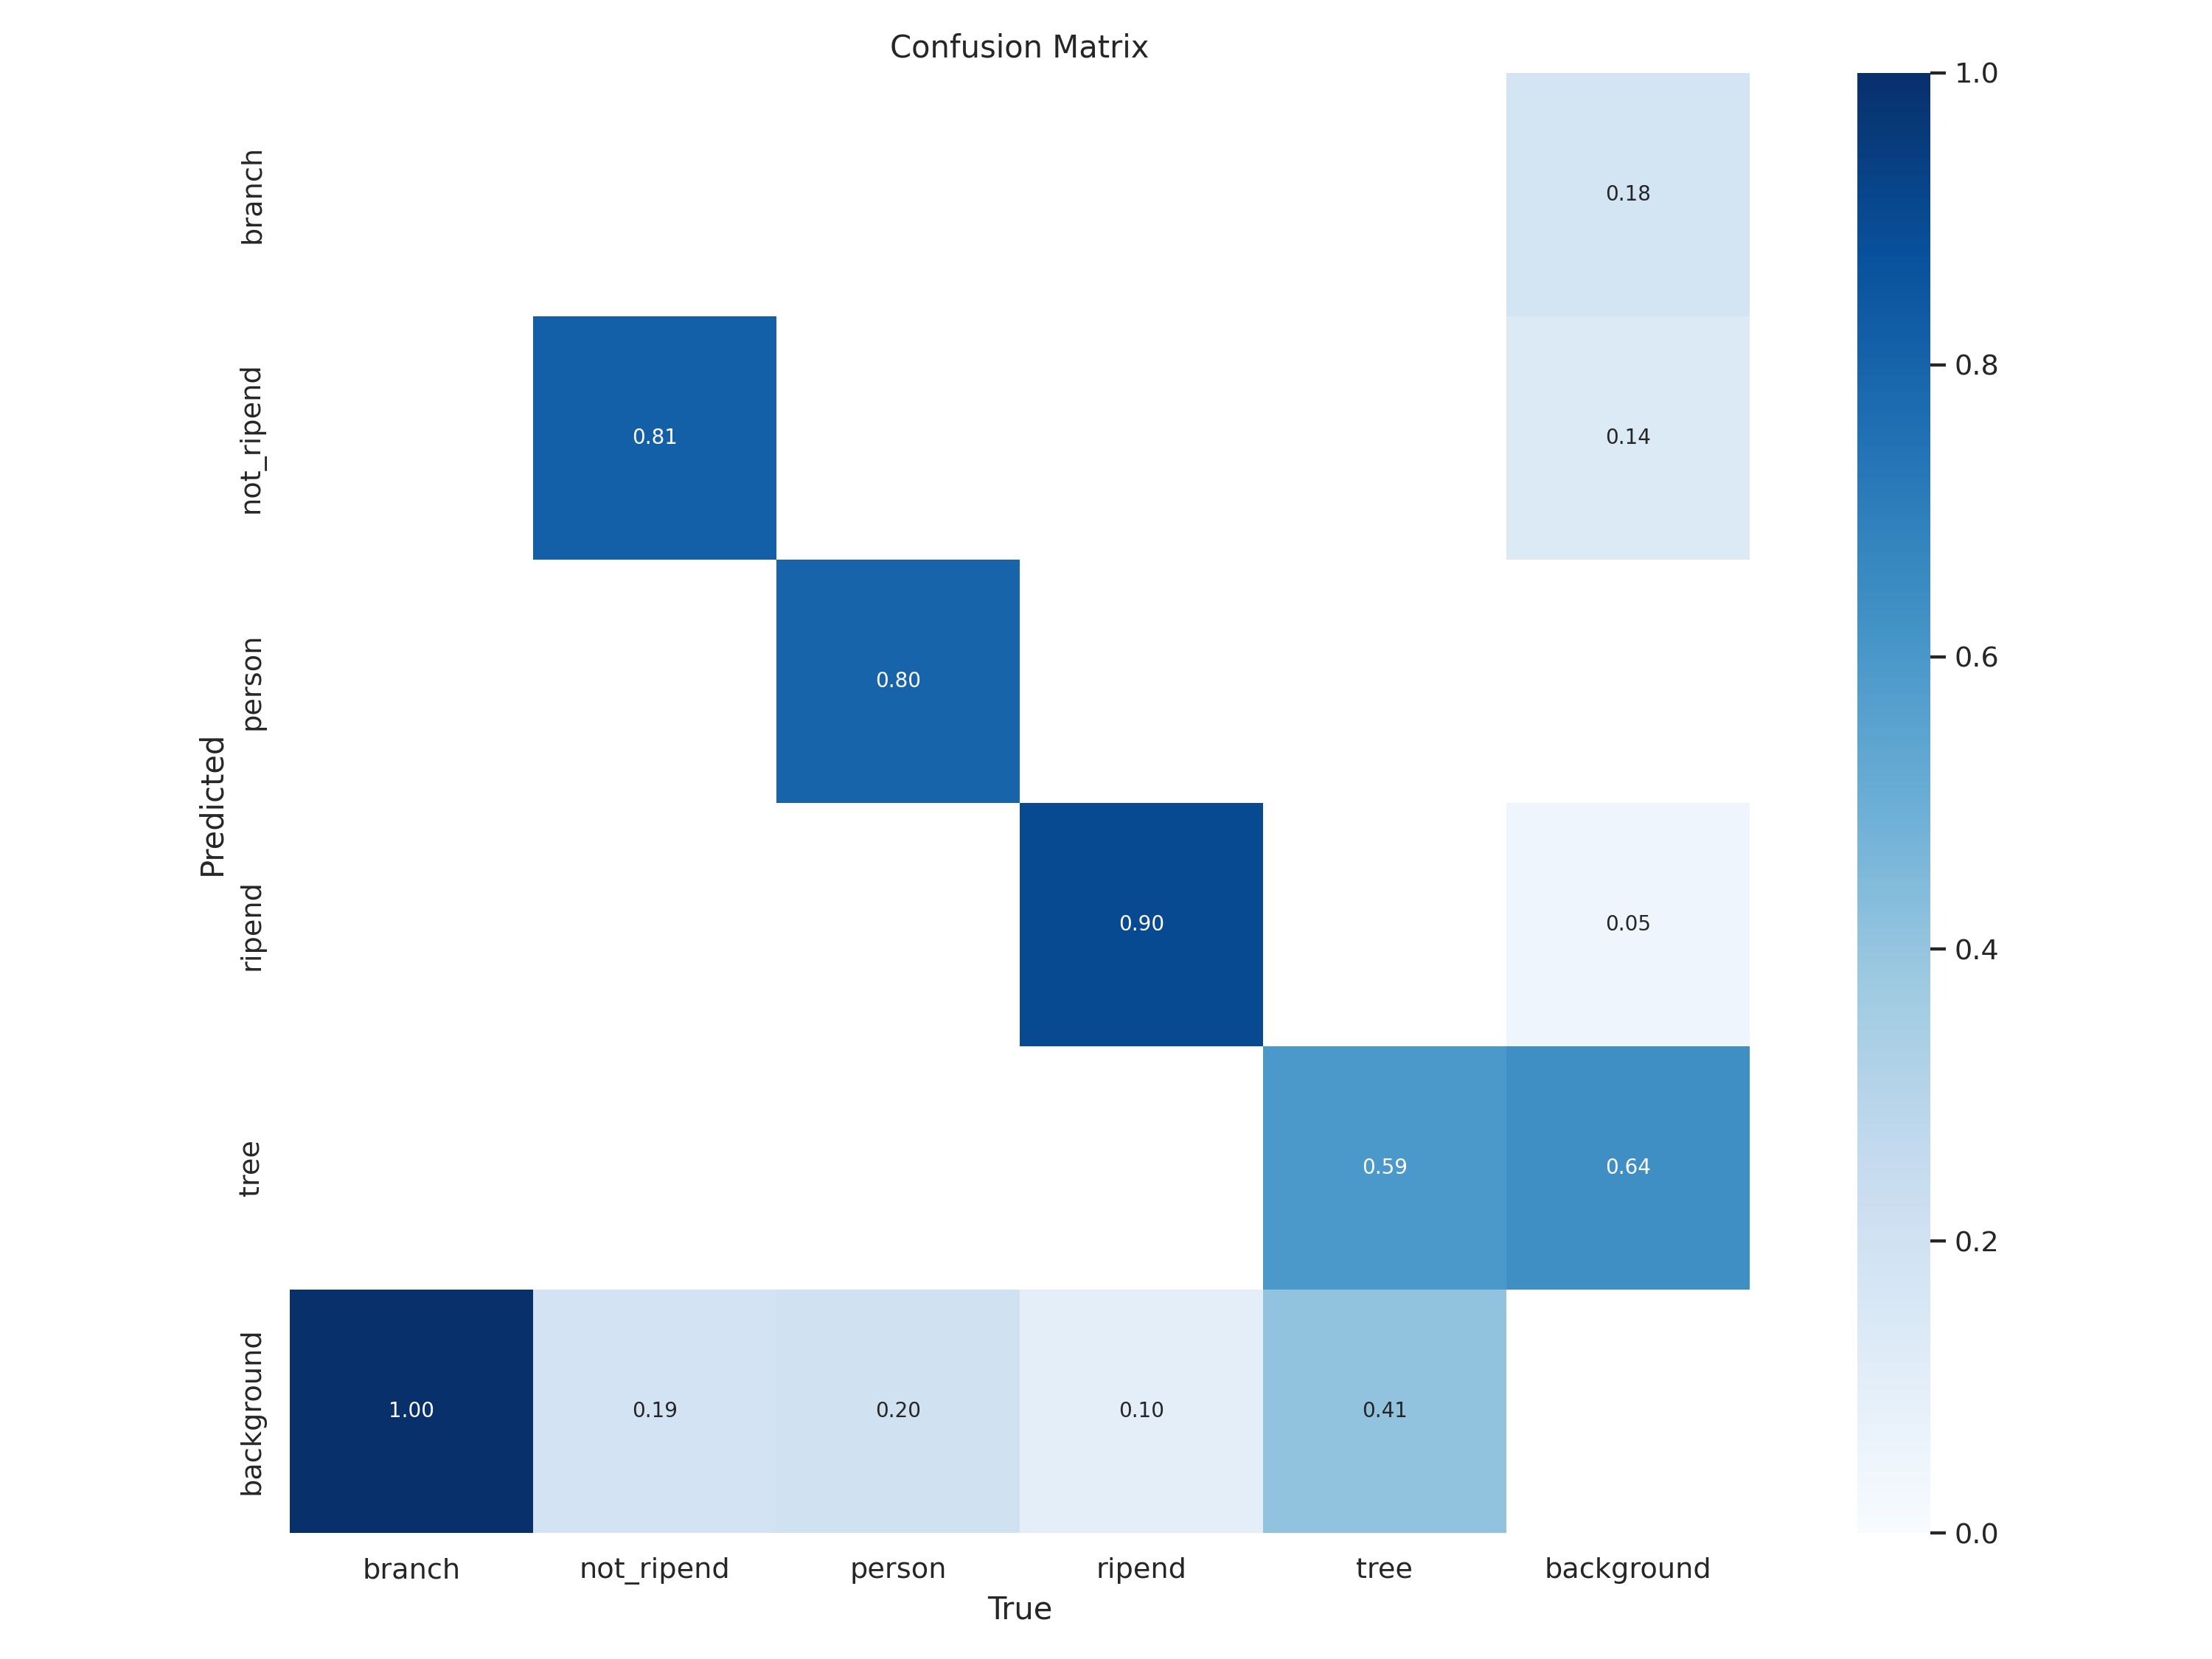

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


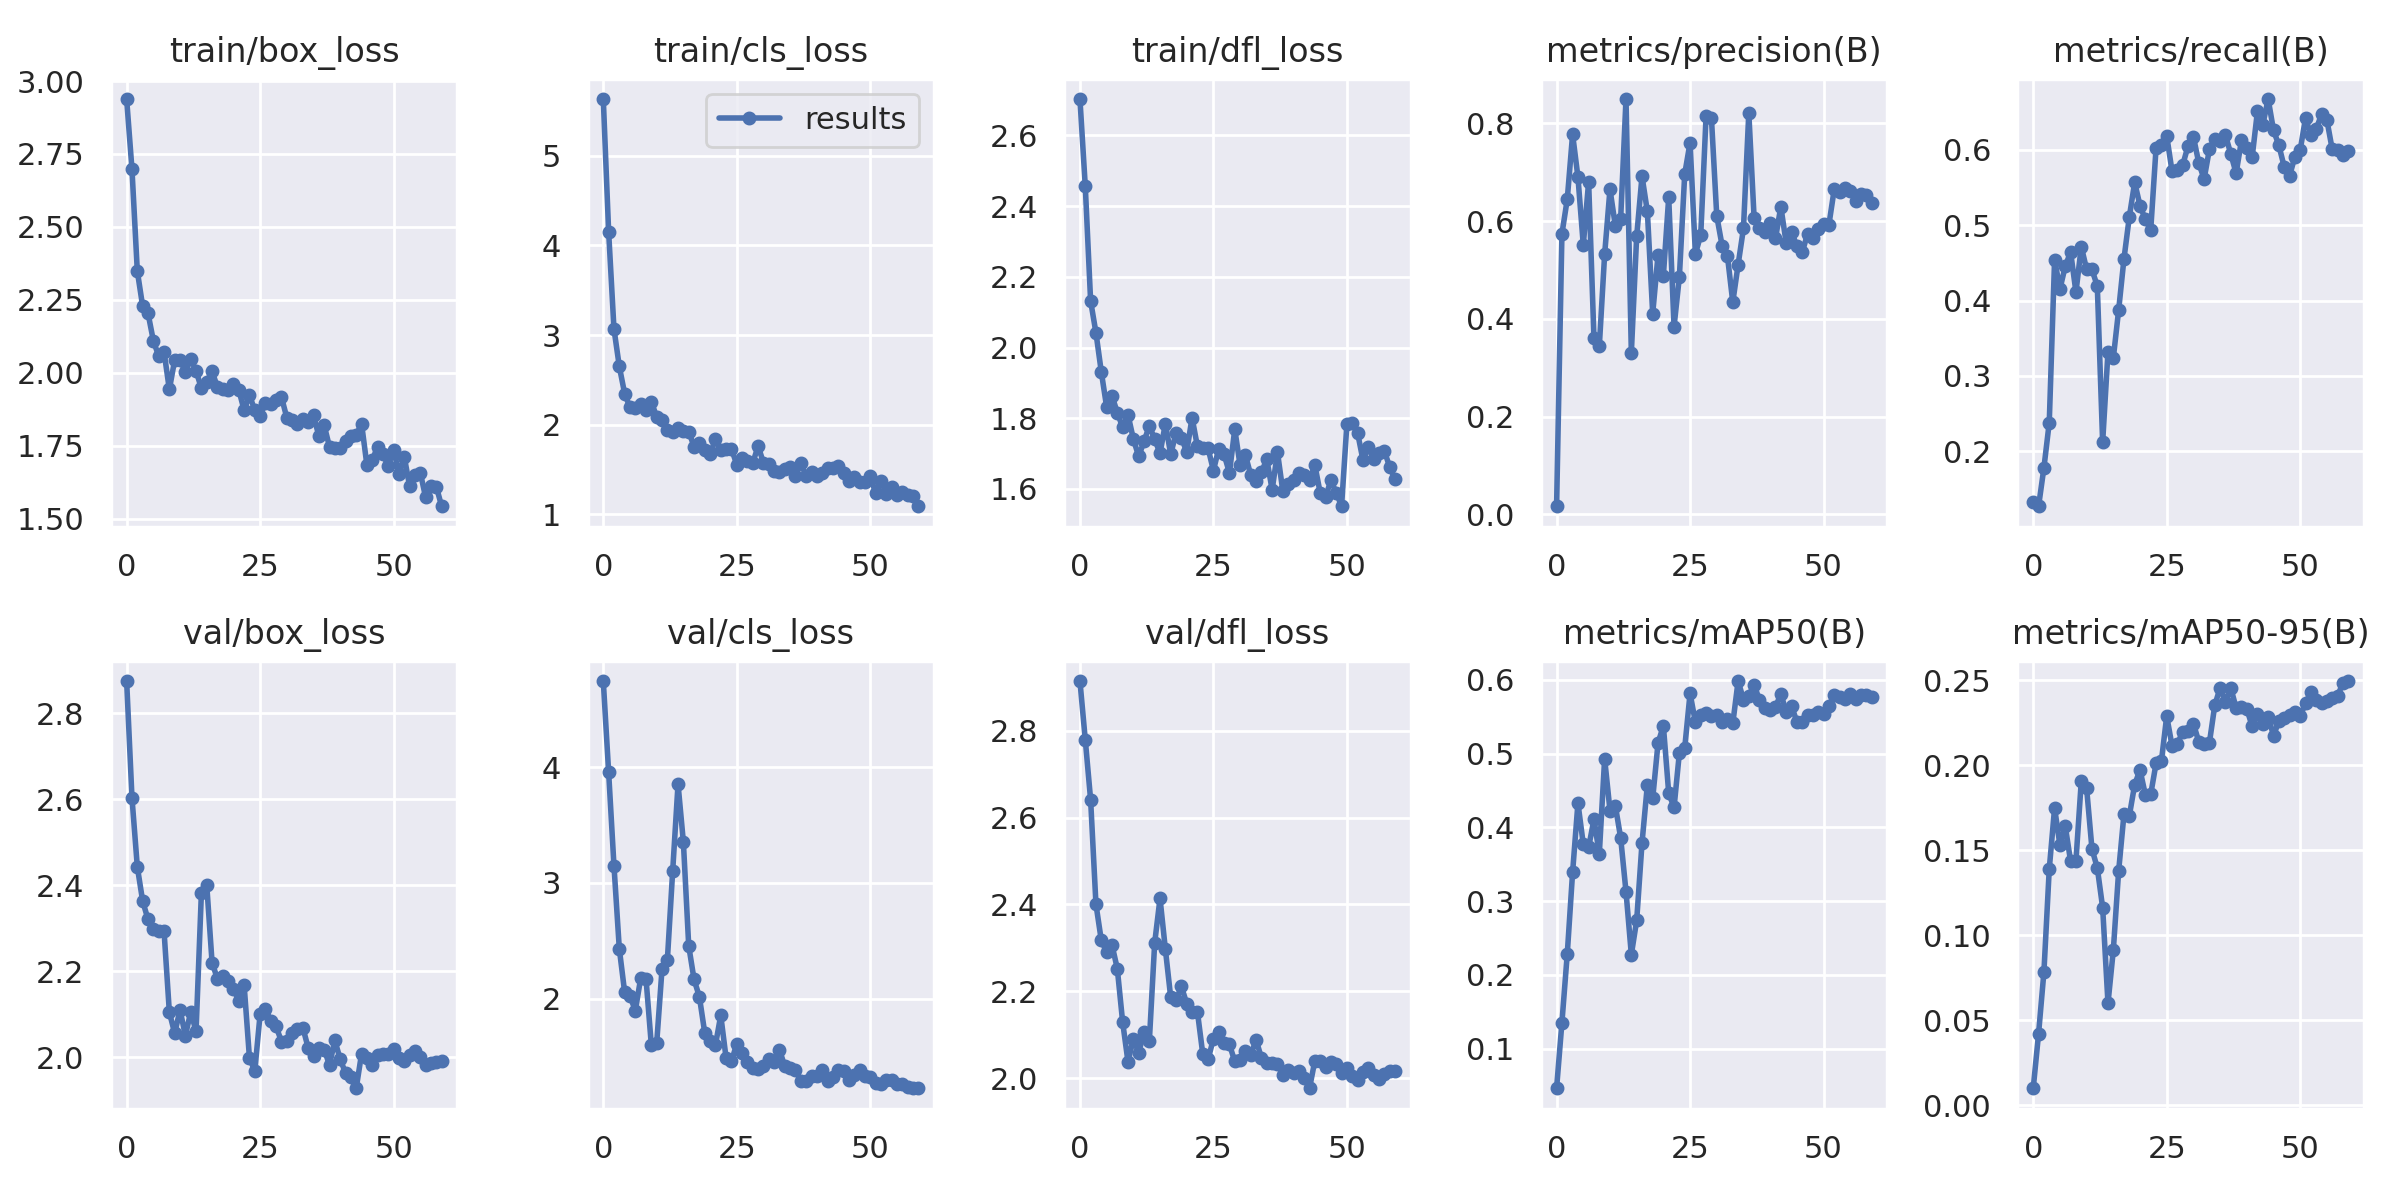

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


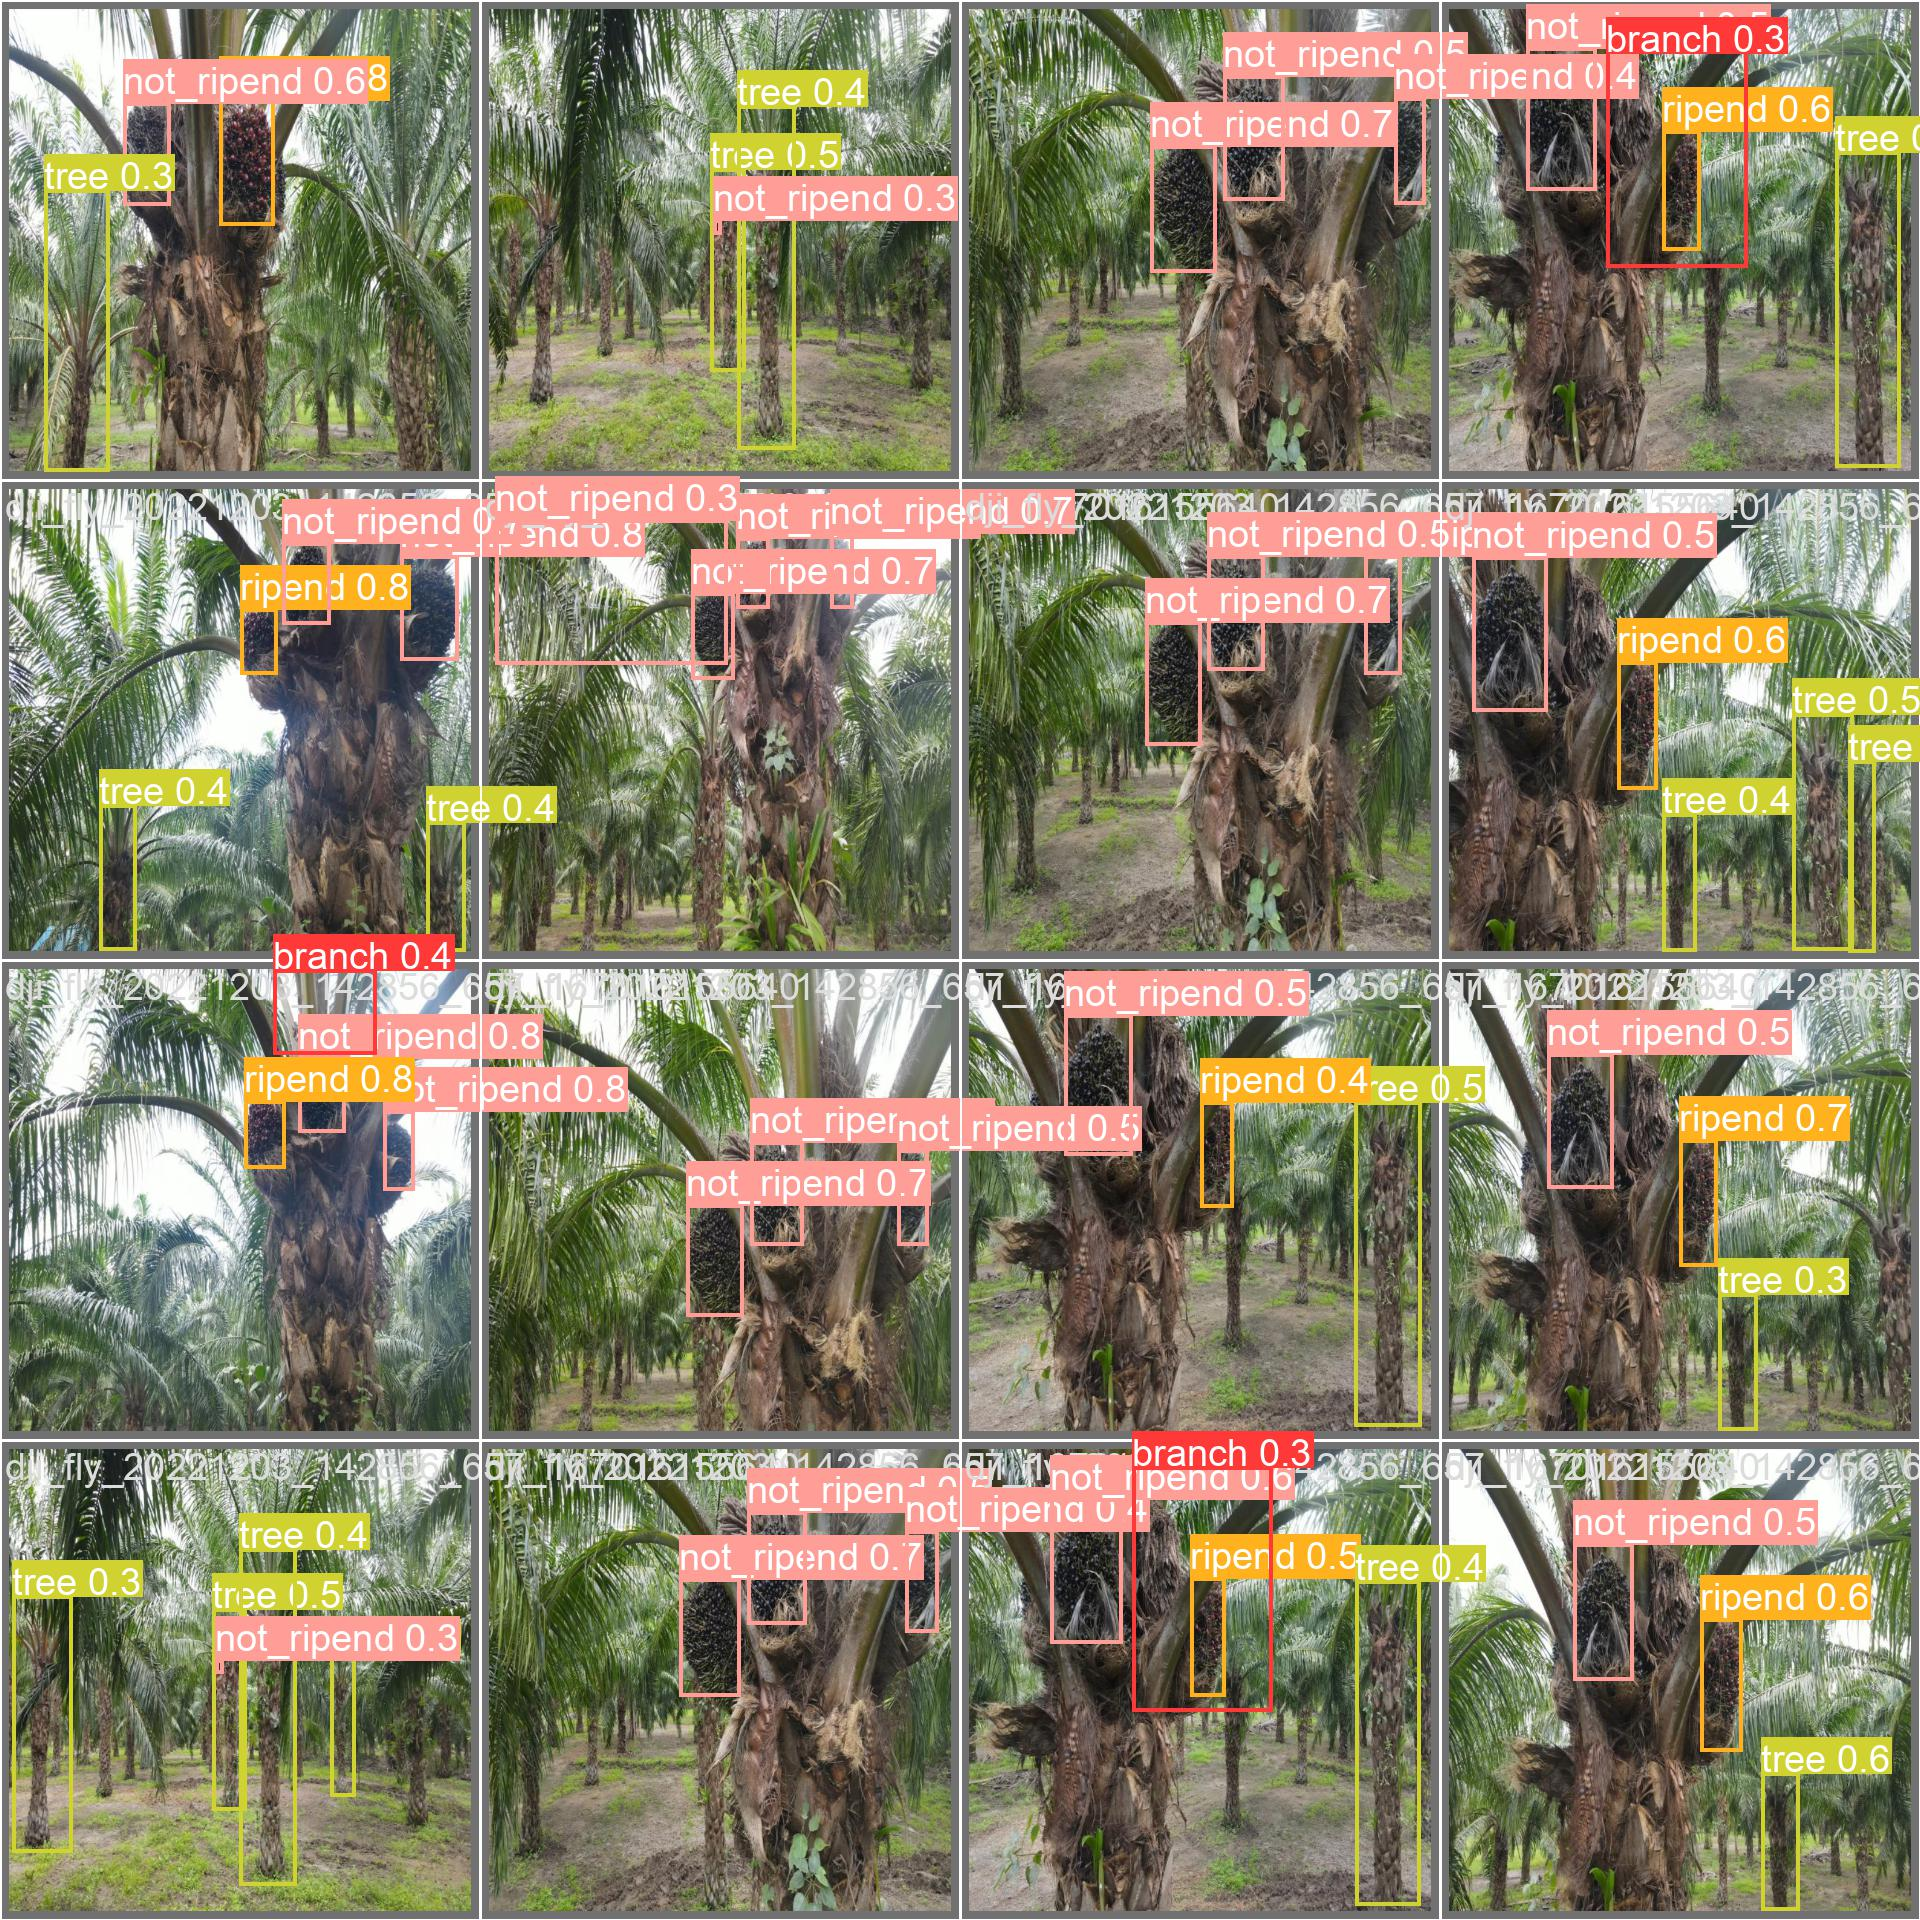

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/fruit-1/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 137. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.10s/it]
                   all         42        137      0.638      0.598      0.577       0.25
                branch         42         11          0          0     0.0352     0.0131
            not_ripend         42         59      0.804      0.797       0.72      0.331
                person         42 

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-102_jpg.rf.2cd79a42febef9d007672bd1dcf3d720.jpg: 800x800 1 not_ripend, 1 ripend, 1 tree, 65.6ms
image 2/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-104_jpg.rf.276387f53127e4ad65cc92bffff5ac90.jpg: 800x800 1 not_ripend, 1 ripend, 1 tree, 40.7ms
image 3/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-126_jpg.rf.837d22d2ba9614adad94aa0f6bd576d1.jpg: 800x800 1 not_ripend, 1 ripend, 1 tree, 39.7ms
image 4/23 /content/datasets/fruit-1/test/images/dji_fly_20221203_142856_657_1670161556406_video_mp4-145_jpg.rf.499abf9d0ae29b23a43d22049723b701.jpg: 800x800 1 not_ripend, 1 ripend, 1 tree, 40.5ms
image 5/23 /content/datasets/fruit-

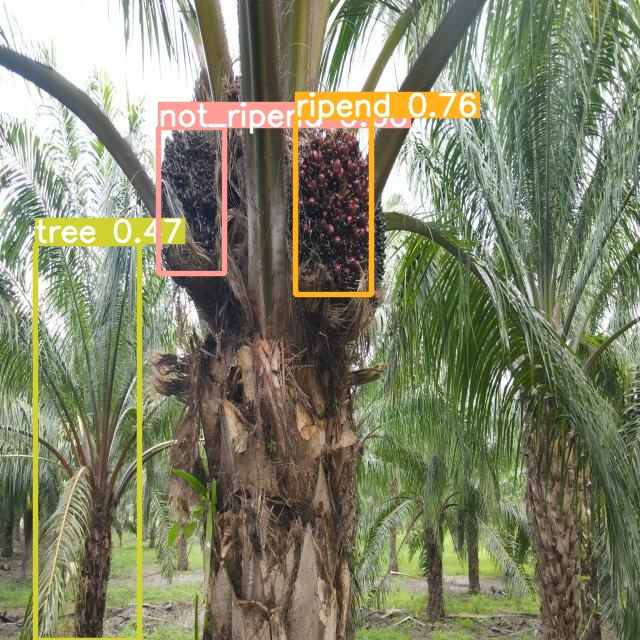

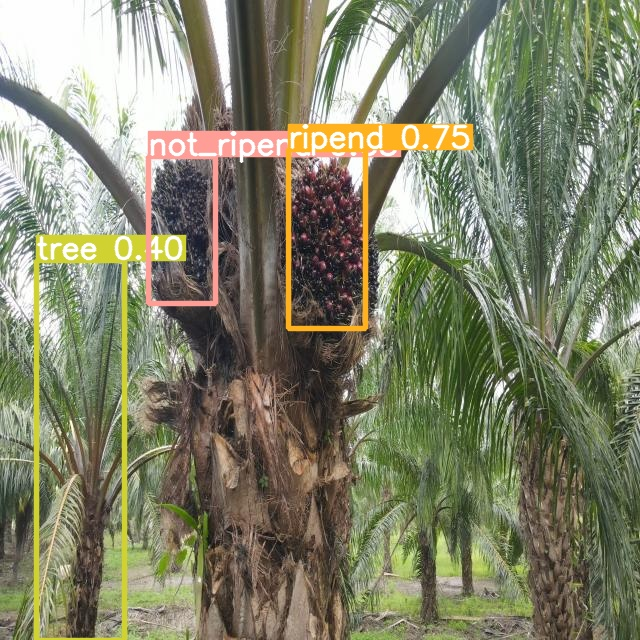

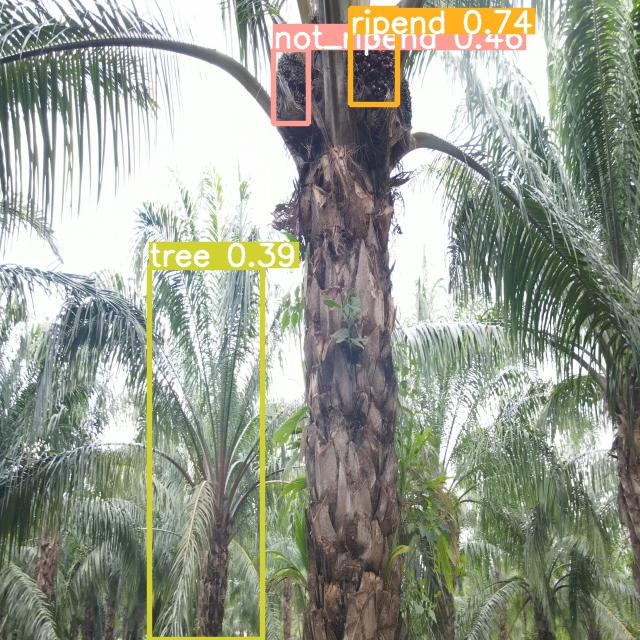

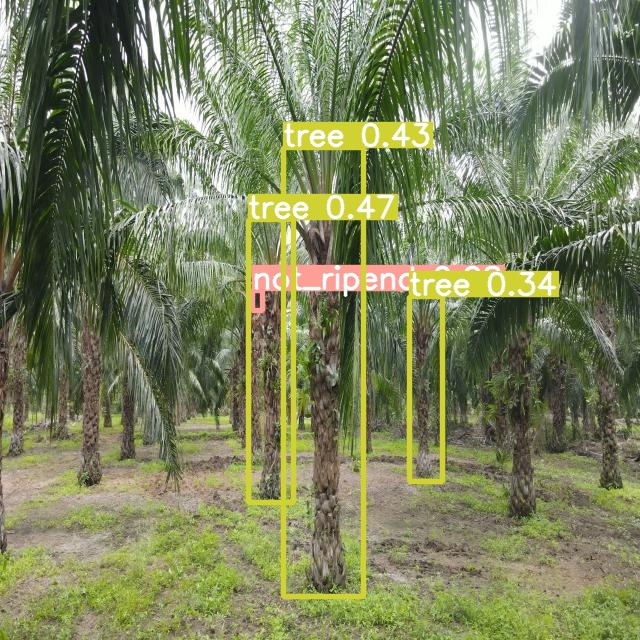

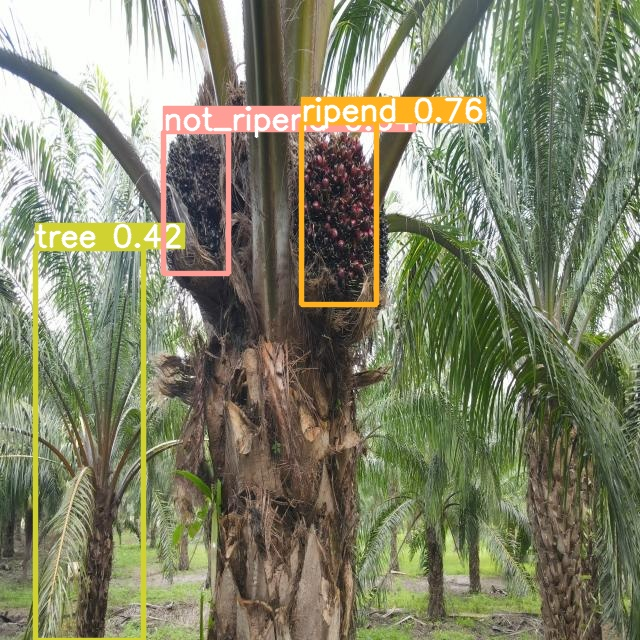

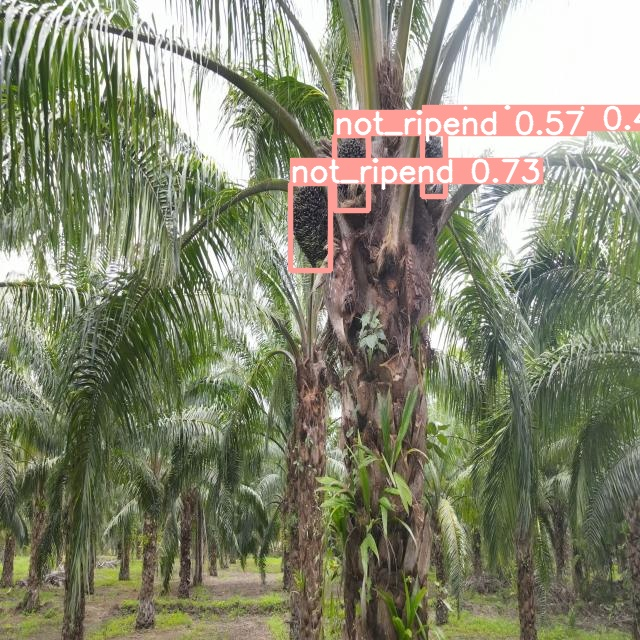

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[10:16]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/6.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/145) /content/6.mp4: 480x800 2 not_ripends, 45.6ms
video 1/1 (2/145) /content/6.mp4: 480x800 2 not_ripends, 44.3ms
video 1/1 (3/145) /content/6.mp4: 480x800 2 not_ripends, 26.2ms
video 1/1 (4/145) /content/6.mp4: 480x800 2 not_ripends, 26.2ms
video 1/1 (5/145) /content/6.mp4: 480x800 2 not_ripends, 26.2ms
video 1/1 (6/145) /content/6.mp4: 480x800 2 not_ripends, 25.5ms
video 1/1 (7/145) /content/6.mp4: 480x800 2 not_ripends, 25.4ms
video 1/1 (8/145) /content/6.mp4: 480x800 2 not_ripends, 24.9ms
video 1/1 (9/145) /content/6.mp4: 480x800 2 not_ripends, 20.4ms
video 1/1 (10/145) /content/6.mp4: 480x800 1 not_ripend, 20.5ms
video 1/1 (11/145) /content/6.mp4: 480x800 2 not_ripends, 20.0ms
video 1/1 (12/145) /content/6.mp4: 480x800 1 not_ripend, 20.3ms
video 1/1 (13/145) /content/6.mp4: 480x800 1 not_ripen

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/7.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/334) /content/7.mp4: 480x800 45.0ms
video 1/1 (2/334) /content/7.mp4: 480x800 44.3ms
video 1/1 (3/334) /content/7.mp4: 480x800 25.7ms
video 1/1 (4/334) /content/7.mp4: 480x800 25.6ms
video 1/1 (5/334) /content/7.mp4: 480x800 25.6ms
video 1/1 (6/334) /content/7.mp4: 480x800 25.1ms
video 1/1 (7/334) /content/7.mp4: 480x800 24.9ms
video 1/1 (8/334) /content/7.mp4: 480x800 24.9ms
video 1/1 (9/334) /content/7.mp4: 480x800 22.5ms
video 1/1 (10/334) /content/7.mp4: 480x800 20.6ms
video 1/1 (11/334) /content/7.mp4: 480x800 20.5ms
video 1/1 (12/334) /content/7.mp4: 480x800 21.3ms
video 1/1 (13/334) /content/7.mp4: 480x800 20.5ms
video 1/1 (14/334) /content/7.mp4: 480x800 21.2ms
video 1/1 (15/334) /content/7.mp4: 480x800 21.1ms
video 1/1 (16/334) /content/7.mp4: 480x800 20.3ms
video 1/1 (17/334) /content/7.mp

In [ ]:
from ultralytics import YOLO
from ultralytics.yolo.v8.detct.predict import Detectionpredictor
import cv2

model=Yolo("yolo")

OSError: ignored

In [ ]:
from ultralytics import YOLO
from ultralytics.yolo.v8.detect.predict import DetectionPredictor
import cv2


model=YOLO("yolov8s.pt")
results=model.predict(source="0",show=True)
#cv2.imshow(results)
print(results)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



AssertionError: ignored

In [ ]:
#from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from ultralytics.yolo.v8.detect.predict import DetectionPredictor
import cv2


model=YOLO("/content/runs/detect/train/weights/best.pt")

results=model.predict(source="0",show=True,conf=0.5)
cv2.namedWindow("Display", cv2.WINDOW_AUTOSIZE)
cv2_imshow('Display', results)
cv2.waitKey(0)
cv2.destroyAllWindows()

###cv2.imshow(results)
#cv.imshow(results)
#print(results)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



AssertionError: ignored

In [20]:
!pip install supervision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import cv2

from ultralytics import YOLO
import supervision as sv

size_width = 1280
size_height = 720

cap = cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, size_width)

cap.set(cv2.CAP_PROP_FRAME_HEIGHT, size_height)

model = YOLO("/content/runs/detect/train/weights/best.pt")

box_annotator = sv.BoxAnnotator(thickness=2, text_scale=1)

while True:
    ret, frame = cap.read()

    result = model(frame)[0]
    detections = sv.Detections.from_yolov8(result)
    labels = [
        f"{model.model.names[class_id]} {confidence:0.2f}"
        for _, confidence, class_id, _ in detections
    ]

    frame = box_annotator.annotate(scene = frame, detections=detections,labels=labels)

    cv2.imshow("yolov8", frame)

    if (cv2.waitKey(30) == 27):  # press ESC to exit 
     break

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


FileNotFoundError: ignored